In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

590

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=908a669bcfb3a09defdb9398c1514c3f


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
    # Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 12 | kangaatsiaq
Processing Record 2 of Set 12 | illoqqortoormiut
City not found. Skipping...
Processing Record 3 of Set 12 | lavrentiya
Processing Record 4 of Set 12 | bluff
Processing Record 5 of Set 12 | goderich
Processing Record 6 of Set 12 | avarua
Processing Record 7 of Set 12 | saint-philippe
Processing Record 8 of Set 12 | busselton
Processing Record 9 of Set 12 | boddam
Processing Record 10 of Set 12 | hithadhoo
Processing Record 11 of Set 12 | kruisfontein
Processing Record 12 of Set 12 | kedrovyy
Processing Record 13 of Set 12 | manoel urbano
Processing Record 14 of Set 12 | amuntai
Processing Record 15 of Set 12 | buin
Processing Record 16 of Set 12 | mogzon
Processing Record 17 of Set 12 | killybegs
Processing Record 18 of Set 12 | kapaa
Processing Record 19 of Set 12 | anloga
Processing Record 20 of Set 12 | pangnirtung
Processing Record 21 of Set 12 | constitucion
Processing Record 22

Processing Record 33 of Set 15 | bathsheba
Processing Record 34 of Set 15 | kodiak
Processing Record 35 of Set 15 | waipawa
Processing Record 36 of Set 15 | khorixas
Processing Record 37 of Set 15 | fribourg
Processing Record 38 of Set 15 | punta arenas
Processing Record 39 of Set 15 | yellowknife
Processing Record 40 of Set 15 | bengkulu
Processing Record 41 of Set 15 | dikson
Processing Record 42 of Set 15 | coquimbo
Processing Record 43 of Set 15 | aksarka
Processing Record 44 of Set 15 | norman wells
Processing Record 45 of Set 15 | paamiut
Processing Record 46 of Set 15 | rongcheng
Processing Record 47 of Set 15 | khash
Processing Record 48 of Set 15 | hilo
Processing Record 49 of Set 15 | lata
Processing Record 50 of Set 15 | hami
Processing Record 1 of Set 16 | aykhal
Processing Record 2 of Set 16 | niteroi
Processing Record 3 of Set 16 | wer
Processing Record 4 of Set 16 | yulara
Processing Record 5 of Set 16 | berezovyy
Processing Record 6 of Set 16 | axim
Processing Record 7 

Processing Record 20 of Set 19 | mehamn
Processing Record 21 of Set 19 | suwannaphum
Processing Record 22 of Set 19 | lompoc
Processing Record 23 of Set 19 | tommot
Processing Record 24 of Set 19 | basco
Processing Record 25 of Set 19 | high rock
Processing Record 26 of Set 19 | puerto gaitan
Processing Record 27 of Set 19 | yerbogachen
Processing Record 28 of Set 19 | vieux-habitants
Processing Record 29 of Set 19 | guerrero negro
Processing Record 30 of Set 19 | egvekinot
Processing Record 31 of Set 19 | ugep
Processing Record 32 of Set 19 | lima
Processing Record 33 of Set 19 | beitbridge
Processing Record 34 of Set 19 | yanchukan
City not found. Skipping...
Processing Record 35 of Set 19 | ayr
Processing Record 36 of Set 19 | mahon
Processing Record 37 of Set 19 | tsuruoka
Processing Record 38 of Set 19 | bousse
Processing Record 39 of Set 19 | mastic beach
Processing Record 40 of Set 19 | hit
Processing Record 41 of Set 19 | samarai
Processing Record 42 of Set 19 | hounde
Processi

Processing Record 10 of Set 23 | rudnichnyy
Processing Record 11 of Set 23 | waddan
Processing Record 12 of Set 23 | cradock
Processing Record 13 of Set 23 | haines junction
Processing Record 14 of Set 23 | kholtoson
Processing Record 15 of Set 23 | amga
Processing Record 16 of Set 23 | pyaozerskiy
Processing Record 17 of Set 23 | utiroa
City not found. Skipping...
Processing Record 18 of Set 23 | bougouni
Processing Record 19 of Set 23 | chumikan
Processing Record 20 of Set 23 | tutla
City not found. Skipping...
Processing Record 21 of Set 23 | grand-santi
Processing Record 22 of Set 23 | tidore
City not found. Skipping...
Processing Record 23 of Set 23 | buluang
Processing Record 24 of Set 23 | brekstad
Processing Record 25 of Set 23 | agirish
Processing Record 26 of Set 23 | gat
Processing Record 27 of Set 23 | koslan
Processing Record 28 of Set 23 | colotlan
Processing Record 29 of Set 23 | vostok
Processing Record 30 of Set 23 | kingman
Processing Record 31 of Set 23 | puerto nari

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kangaatsiaq,68.3065,-53.4641,32.38,68,59,4.97,GL,2021-09-17 00:34:25
1,Lavrentiya,65.5833,-171.0000,37.56,60,100,3.49,RU,2021-09-17 00:34:21
2,Bluff,-46.6000,168.3333,46.80,52,87,13.87,NZ,2021-09-17 00:37:48
3,Goderich,43.7501,-81.7165,68.32,68,31,4.61,CA,2021-09-17 00:35:08
4,Avarua,-21.2078,-159.7750,78.85,78,75,14.97,CK,2021-09-17 00:37:49
5,Saint-Philippe,-21.3585,55.7679,69.35,81,11,6.24,RE,2021-09-17 00:33:02
6,Busselton,-33.6500,115.3333,53.87,67,100,7.83,AU,2021-09-17 00:33:06
7,Boddam,57.4667,-1.7833,58.12,91,100,16.62,GB,2021-09-17 00:37:50
8,Hithadhoo,-0.6000,73.0833,83.28,72,100,8.88,MV,2021-09-17 00:37:50
9,Kruisfontein,-34.0033,24.7314,49.89,81,9,9.22,ZA,2021-09-17 00:37:50


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

FileNotFoundError: [Errno 2] No such file or directory: 'weather_data/cities.csv'

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

FileNotFoundError: [Errno 2] No such file or directory: 'weather_data/Fig1.png'

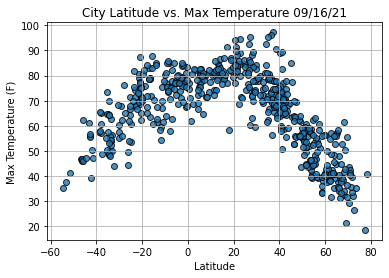

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

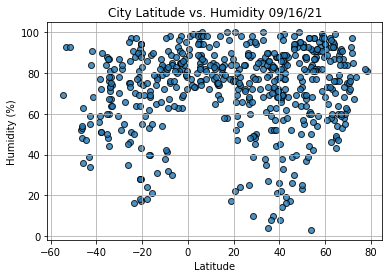

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot.
plt.show()

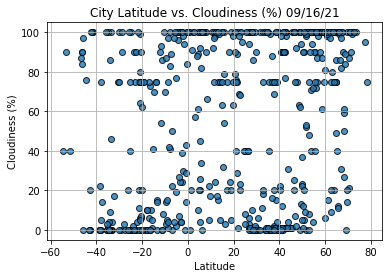

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot.
plt.show()

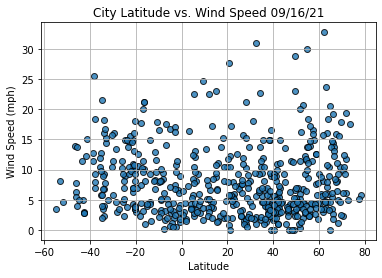

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot.
plt.show()

In [17]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [19]:
index13 = city_data_df.loc[13]

In [20]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3       True
4      False
       ...  
542     True
543     True
544     True
545     True
546     True
Name: Lat, Length: 547, dtype: bool

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kangaatsiaq,68.3065,-53.4641,32.38,68,59,4.97,GL,2021-09-17 00:34:25
1,Lavrentiya,65.5833,-171.0000,37.56,60,100,3.49,RU,2021-09-17 00:34:21
3,Goderich,43.7501,-81.7165,68.32,68,31,4.61,CA,2021-09-17 00:35:08
7,Boddam,57.4667,-1.7833,58.12,91,100,16.62,GB,2021-09-17 00:37:50
10,Kedrovyy,56.1667,91.8167,46.81,88,72,2.68,RU,2021-09-17 00:37:51


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

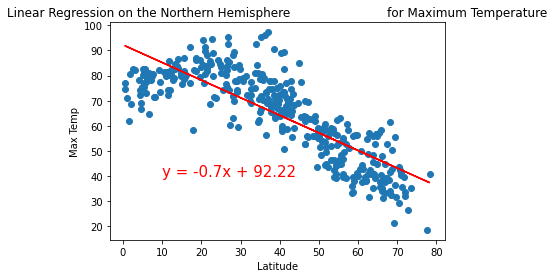

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for Maximum Temperature', 'Max Temp',(-50,90))

SyntaxError: EOL while scanning string literal (<ipython-input-28-8677a9d312d4>, line 6)

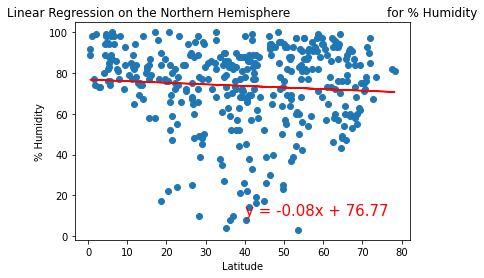

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for % Humidity', '% Humidity',(-50,15))

SyntaxError: EOL while scanning string literal (<ipython-input-30-9c3e8b244753>, line 6)

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n
                        for % Cloudiness', '% Cloudiness',(-50,60))

SyntaxError: EOL while scanning string literal (<ipython-input-33-5449f9d8c839>, line 6)

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for % Cloudiness', '% Cloudiness',(-50,60))

SyntaxError: EOL while scanning string literal (<ipython-input-31-3dc99b339452>, line 6)

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n
                        for Wind Speed', 'Wind Speed',(40,35))

SyntaxError: EOL while scanning string literal (<ipython-input-34-7024af74f12d>, line 6)

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for Wind Speed', 'Wind Speed',(-50,35))

SyntaxError: EOL while scanning string literal (<ipython-input-35-8c4f0e57bb27>, line 6)